# More fun with IIIF

[IIIF](https://iiif.io/) (the International Image Interoperability Framework) has defined a set of standards for publishing and using image collections. The State Library of Victoria makes many of its images available from an IIIF-compliant server. This means you can access and manipulate the images in standard ways set out by the [IIIF Image API](https://iiif.io/api/image/2.1/). This notebook demonstrates some of the possibilities.

You can view more information about the [default image](http://handle.slv.vic.gov.au/10381/25896) used in this notebook on the SLV site. If you would like to try these examples with another image:

- Go to the image in the SLV viewer
- Look at the url in your browser's location bar and identify the image identifier – it has the format `IE[NUMERIC id]`, for example `IE1164978`
- Copy the image identifier and paste it into the cell below

For example, the identifier of this image – <https://viewer.slv.vic.gov.au/?entity=IE1164978&mode=browse> – is `IE1164978`.

In [1]:
# Edit this cell to change the image
image_pid = "IE1164978"

Information about IIIF images is published as a 'manifest' in JSON format. You can use the image identifier to construct a url that points to a manifest.

In [2]:
# Construct the manifest url
manifest_url = f"https://rosetta.slv.vic.gov.au/delivery/iiif/presentation/2.1/{image_pid}/manifest.json"
print(f"IIIF manifest url: {manifest_url}")

IIIF manifest url: https://rosetta.slv.vic.gov.au/delivery/iiif/presentation/2.1/IE1164978/manifest.json


## Setting things up

In [3]:
import requests
from IPython.display import Image, display

In [4]:
def get_image_ids(manifest):
    """
    Extract a list of image @ids from an IIIF manifest
    """
    image_ids = []
    # There can be multiple images in a record
    # So we loop through the canvases to get each one.
    for canvas in manifest["sequences"][0]["canvases"]:
        image_ids.append(canvas["images"][0]["resource"]["service"]["@id"])
    return image_ids

Download the image manifest and extract the IIIF identifiers for each individual image. A manifest can include details of multiple images.

We'll use the first image in the examples below.

In [5]:
response = requests.get(manifest_url)
manifest = response.json()
# Get the id of the first image in the manifest
# We'll use this id in the examples
image_id = get_image_ids(manifest)[0]
print(f"IIIF image id: {image_id}")

IIIF image id: https://rosetta.slv.vic.gov.au:2083/iiif/2/IE1164978:FL20951000.jpg


## IIIF image parameters

A request for an image from an IIIF-compliant server includes the following parameters: **region**, **size**, **rotation**, **quality**, and **format**.

The parameters are supplied in the url you use to request an image. Here's a IIIF url with the default parameters.

```
https://rosetta.slv.vic.gov.au:2083/iiif/2/IE1164978:FL20951000.jpg/full/max/0/default.jpg
```

Let's break it down:

*  `full` – supply the complete image (not cropped or sliced)
* `max` – supply the image at its largest possible size
* `0` – supply the image with a rotation of 0 degrees
* `default` – supply the image in its current quality (no colour changes)
* `jpg` – supply the image in JPEG format

All of these can be changed.

Note that the transformations are applied in the order they're supplied in the url. So if you specify a region and a size, the region will be selected from the full image and then resized.

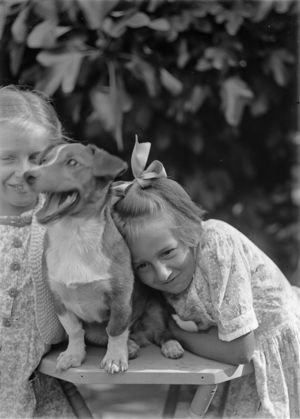

In [6]:
# For easy display we're asking for a maximum width of 300 pixels
image_url = f"{image_id}/full/300,/0/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

## Select a region

We can ask for just part of the image to be returned.

If we want a square, centered image, we can just use the `square` value.

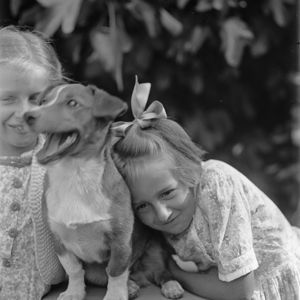

In [7]:
# For easy display we're asking for a maximum width of 300 pixels
image_url = f"{image_id}/square/300,/0/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

For more control, we can specify a region using coordinates. Let's ask for the top left corner of the image.

Here we specify the `x` and `y` coordinates of the top left-hand corner of our selection, followed by the required `width` and `height`. So to get a 1000 x 200 pixel slice, starting at the top left of the image, we want `0,0,1000,200`.

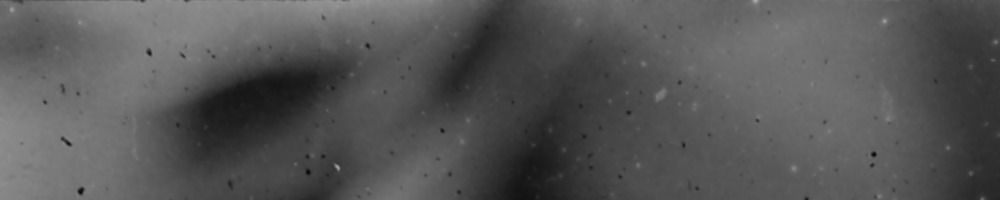

In [8]:
image_url = f"{image_id}/0,0,1000,200/max/0/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

Note that the manifest includes the full image dimensions, so you could retrieve and use them in your selections.

We can also specify a region using percentages rather than pixel numbers. So if we want the centre of the image we could try `pct:46,46,8,8`, which will select a region that's 8% of the width and height of the original, starting at a point that's 46% of the distance from the top and left.

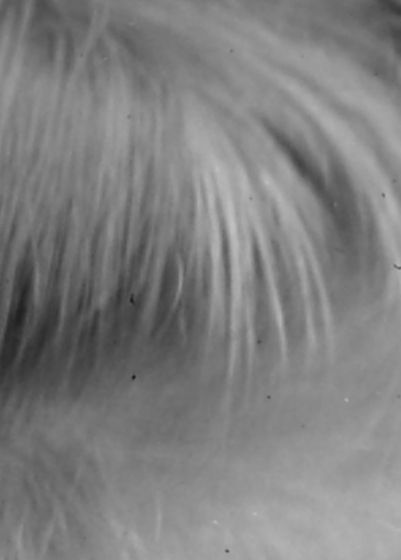

In [9]:
image_url = f"{image_id}/pct:46,46,8,8/max/0/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

## Specify a size

We've already seen this in action. Just specify a width, a height, or both (in pixels). If you supply both, the aspect ratio will probably get screwed up. You can prevent this by adding a `!` before the parameters – this will maintain the aspect ratio, while returning an image within the prescribed dimension.

So to to create a thumbnail with a maximum dimension of 200 px, we can use `!200,200`.

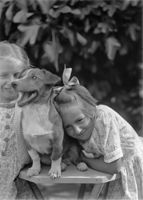

In [10]:
image_url = f"{image_id}/full/!200,200/0/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

We can also supply a percentage. So for an image that's 10% of the original, we'd specify `pct:10`.

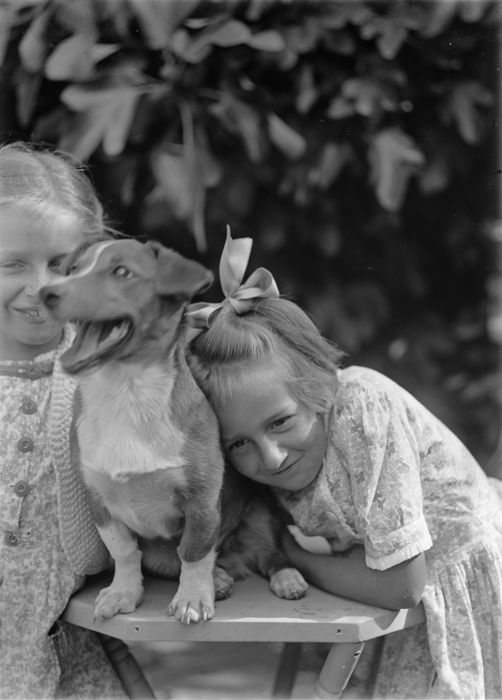

In [11]:
image_url = f"{image_id}/full/pct:10/0/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

## Rotate and reflect the image

The third parameter is just the number of degrees the image should be rotated by. Let's rotate by 45 degrees.

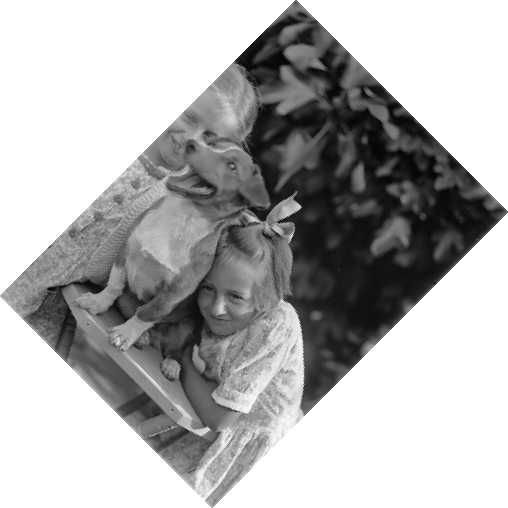

In [12]:
# For easy display we're asking for a maximum width of 300 pixels
# We're also asking for the result as a PNG, so that the background is transparent
image_url = f"{image_id}/full/300,/45/default.png"
response = requests.get(image_url)
display(Image(response.content))

If we add a `!` at the start the image is also reflected. So to just reverse the image we can use `!0`.

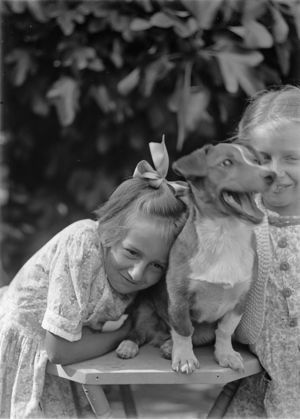

In [13]:
# For easy display we're asking for a maximum width of 300 pixels
image_url = f"{image_id}/full/300,/!0/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

Back to front and upside down!

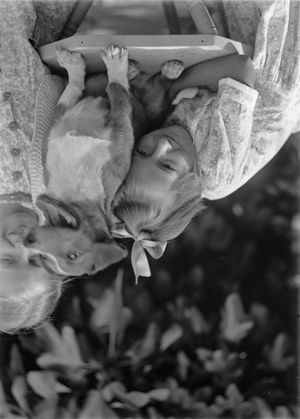

In [14]:
# For easy display we're asking for a maximum width of 300 pixels
image_url = f"{image_id}/full/300,/!180/default.jpg"
response = requests.get(image_url)
display(Image(response.content))

## Change the quality

The quality parameter specifies whether the image is delivered as color, grayscale or black and white. Let's try converting to a bitonal (black and white) image.

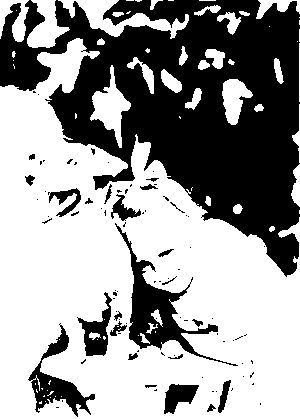

In [15]:
# For easy display we're asking for a maximum width of 300 pixels
image_url = f"{image_id}/full/300,/0/bitonal.jpg"
response = requests.get(image_url)
display(Image(response.content))

## Change the format

To change the format of the image, just change the file extension at the end of the url. So to get a JPEG:

```
https://rosetta.slv.vic.gov.au:2083/iiif/2/IE1164978:FL20951000.jpg/full/max/0/default.jpg
```

or a TIFF:

```
https://rosetta.slv.vic.gov.au:2083/iiif/2/IE1164978:FL20951000.jpg/full/max/0/default.tif
```

----

Created by [Tim Sherratt](https://timsherratt.au) for the [GLAM Workbench](https://glam-workbench.net). If you find this useful, you can [sponsor me on GitHub](https://github.com/sponsors/wragge).